# Part II - Proper Loans Data Exploration
## by Koketso Mangwale

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a>   
</li>   
<li><a href="#close">Conclusions</a></li> 
</ul>

<a id='intro'></a>
## Investigative Overview
In this project we will explore and analyse the loans data from Prosper in Q4 2005 to Q1 2014 in the USA. The dataset is made up of 113 937 loans and 81 features.

 ## Dataset Overview 
 The dataset is about historic loans data from Prosper. It is made up of the borrower credit profile, location, employment, income, payment history, loan information, borrower's credit score change over time as well as loan investment information.

There are 113 937 loans with 81 features. There is a small amount of features that will be chosen for this analysis. Each loan observation is uniquely identified by a listing key and the date that each listing was created ranges from November 9, 2005 to March 10, 2014.

<a id='wrangle'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from wordcloud import WordCloud

%matplotlib inline


In [2]:
#load Prosper loans data into a dataframe
prosper_loans = pd.read_csv('prosperLoanData.csv')

__Missing Values__

In [3]:
#use isnull() to assess missing data
missing_data = prosper_loans.isnull().sum()
missing_data.sort_values(ascending = False).head(20)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
dtype: int64

###### Data wrangling
Renaming columns, splitting one feature into 2 features.

In [4]:
# define function for splitting column
def splitFeature(df):
    
    #extract year in this form 'YYYY' and store in new column 'Year'
    df['Year'] = df.LoanOriginationQuarter.str.extract('(\d\d\d\d)', expand =True)
    
    #convert year to type int
    df['Year'] = df['Year'].astype(str).astype(int)
    
    #extract pattern for quarter and store in new column 'Quarter'
    df['Quarter'] =   df.LoanOriginationQuarter.str.extract('(Q[0-9]) ', expand =True)

In [5]:
#call splitFeature
splitFeature(prosper_loans)

In [6]:
# rename columns to remove spacing and '()' characters in column names
prosper_loans.rename(columns={'ListingCategory (numeric)' : 'ListingCategoryNumeric'}, inplace = True)
prosper_loans.rename(columns={'ProsperRating (Alpha)' : 'ProsperRatingAlpha'}, inplace = True)
prosper_loans.rename(columns={'ProsperRating (numeric)' : 'ProsperRatingNumeric'}, inplace = True)
prosper_loans.rename(columns={'TradesNeverDelinquent (percentage)' : 'TradesNeverDelinquentPercentage'}, inplace = True)

In [7]:
#set the background style for the plots to dark
sb.set_style('dark')

### Distribution of Borrower APR and Interest Rates

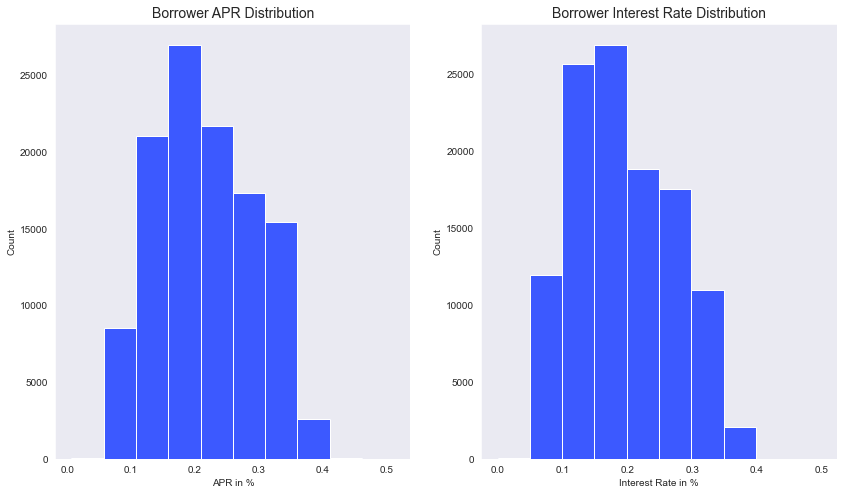

In [8]:
#subplots of loans APR and interest rate
plt.figure(figsize=[14, 8])

plt.subplot(1, 2, 1)
plt.hist(prosper_loans['BorrowerAPR'], color='#3C59FF', bins=10)
plt.xlabel('APR in %')
plt.ylabel('Count')
plt.title('Borrower APR Distribution', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(prosper_loans['BorrowerRate'], color='#3C59FF', bins=10)
plt.xlabel('Interest Rate in %')
plt.ylabel('Count')
plt.title('Borrower Interest Rate Distribution', fontsize=14)

plt.show();

 __Findings:__
- The a data is right skewed.
- The median APR and median interest rate are slightly lower than the average. The typical APR and interest rate is about 0.2%.
- A high density of borrowers have an APR of about 0.2% and interest rates of 0.18%
- This is followed by a density of borrowers with an APR of between 0.2% and 0.25% and interest rates between 0.1% and 0.15% 
- About 2 500 borrowers have APR's and interest rates above 0.35%.

### Distribution of Loans with Verifiable Income

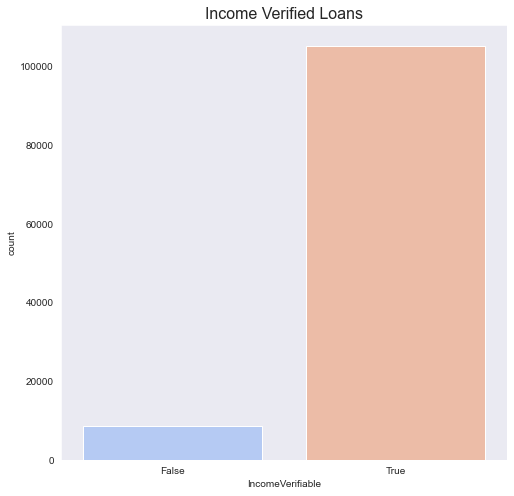

In [9]:
#bar chart to depict the number of loans by income verifiable

plt.figure(figsize=[8, 8])
sb.countplot(data=prosper_loans, x = 'IncomeVerifiable', palette='coolwarm');
plt.title('Income Verified Loans', fontsize=16);

 __Findings:__
- There is a high frequency of loans that are income verified./Most of the loans are income verified
- More than 100 000 loans are income verified.

### Distribution of Debt to Income (DTI) Ratio

In [10]:

prosper_loans['DebtToIncomeRatio'] = prosper_loans['DebtToIncomeRatio'].apply(lambda r: 1.01 if r > 1 else r)


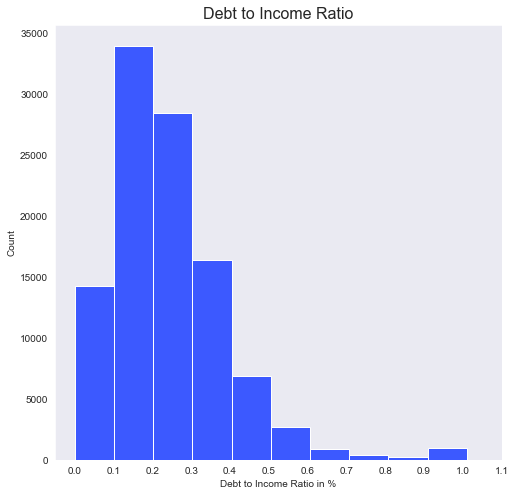

In [11]:
plt.figure(figsize=[8, 8])

plt.hist(prosper_loans['DebtToIncomeRatio'], color='#3C59FF')
plt.xticks(np.arange(0, 1.2, 0.1))
plt.xlabel('Debt to Income Ratio in %')
plt.ylabel('Count')
plt.title('Debt to Income Ratio', fontsize=16);

 __Findings:__
- The data is right skewed or positively skewed and the typical borrower DTI is 20%.
- The average DTI is slightly larger than the median.
- A high density of borrowers have an DTI ratio between 10% and 20%
- This is followed by a density of borrowers with an DTI ratio between 20% and 30%

### Loan Status

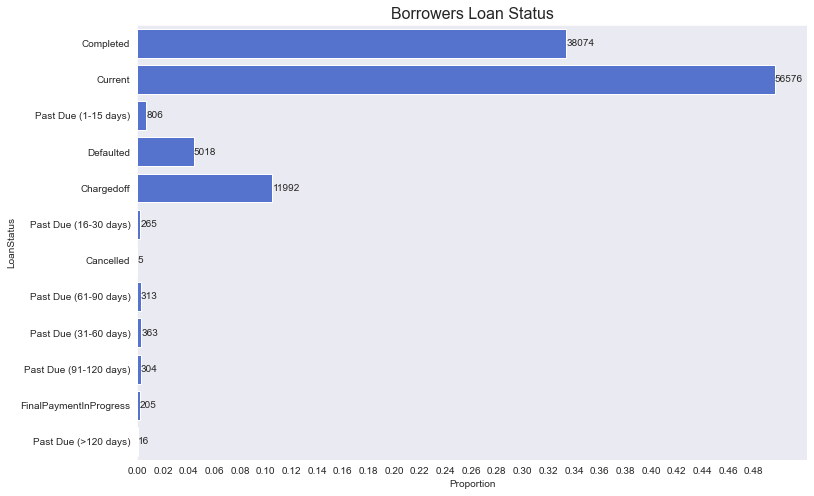

In [12]:
#relative frequency of loans by deliquency. TO DO. Should I combine the past due columns into 1 column?????
n_loan_past = prosper_loans['LoanStatus'].value_counts().sum()
max_loan_past = prosper_loans['LoanStatus'].value_counts()[0]
max_past_prop = max_loan_past/n_loan_past

#create an array of evenly spaced proportions
prop_ticks3 = np.arange(0, max_past_prop, 0.02)
status_ticks3 = ['{:0.2f}'.format(v) for v in prop_ticks3]

plt.figure(figsize=[12, 8])
loan_status_fig = sb.countplot(data=prosper_loans, y = 'LoanStatus', color='royalblue');
plt.xticks(prop_ticks3 * n_loan_past, status_ticks3)
plt.bar_label(loan_status_fig.containers[0])
plt.xlabel('Proportion')
plt.title('Borrowers Loan Status', fontsize=16);

 __Findings:__
- About 4% of the loans are in default.

In [13]:
#take a random sample of 5000 loans to reduce over - plotting
np.random.seed(5000)
sample = np.random.choice(prosper_loans.shape[0], 5000, replace = False)
loans_sample = prosper_loans.loc[sample]

### Borrower APR vs Interest Rate

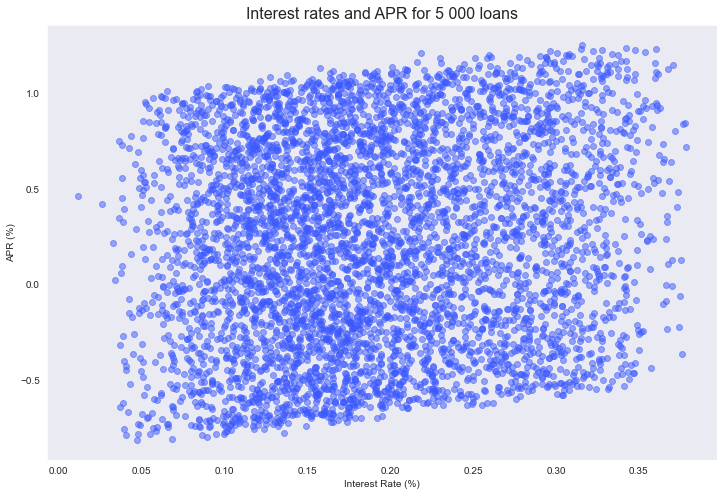

In [14]:
plt.figure(figsize=[12, 8])

#plt.subplot(1, 2, 1)
sb.regplot(data = loans_sample, x = 'BorrowerRate', y = 'BorrowerAPR' , 
           x_jitter = 0.03, y_jitter = 0.9, scatter_kws = {'alpha' : 0.5}, color = '#3C59FF', fit_reg = False);
plt.title('Interest rates and APR for 5 000 loans', fontsize=16) 
plt.xlabel('Interest Rate (%)')
plt.ylabel('APR (%)');

__Findings:__
   - Borrower APR and interest rate are positively correlated. When APR increases so does the interest rate.
   - There is an area of high frequency where APR is 0.1 and 0.4 and interest rate is between 0.05 and 0.35

### Prosper Score vs BorrowerAPR

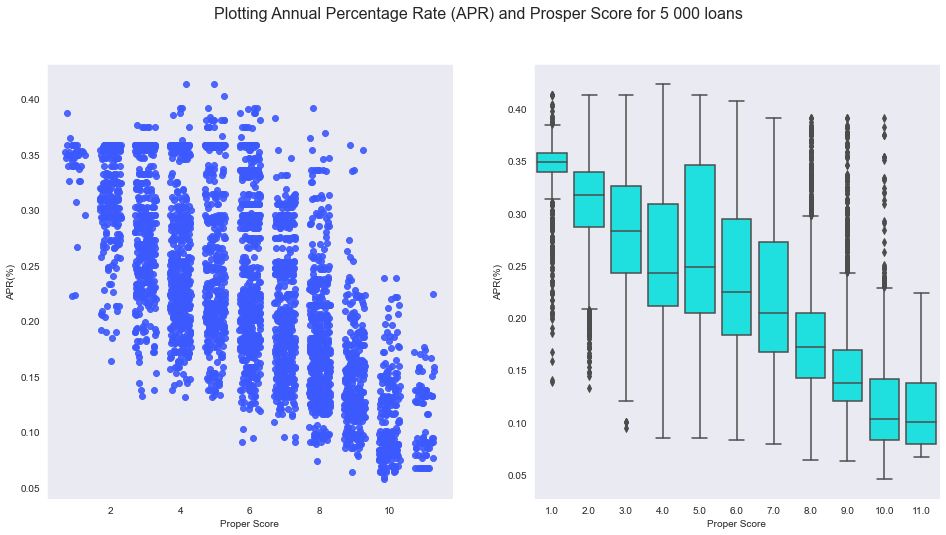

In [15]:
plt.figure(figsize=[16, 8])

plt.suptitle('Plotting Annual Percentage Rate (APR) and Prosper Score for 5 000 loans', fontsize=16)   

plt.subplot(1, 2, 1)
sb.regplot(data = loans_sample, y = 'BorrowerAPR', x = 'ProsperScore' ,
           x_jitter = 0.3, scatter_kws = {'alpha' : 0.9}, color = '#3C59FF', fit_reg = False)
plt.xlabel('Proper Score')
plt.ylabel('APR(%)')

plt.subplot(1, 2, 2)
sb.boxplot(data = prosper_loans, x ='ProsperScore' , y = 'BorrowerAPR', color = 'cyan')
plt.xlabel('Proper Score')
plt.ylabel('APR(%)')

plt.show();

__Findings:__
- As the the prosper score gets higher, the median Annual % Rate lowers.
- There is outlier AP Rates with prosper scores 1 - 3 and 8 - 10. 
- There is more variation with borrowers a prosper score of 5.
- The box plot above indicates that loan prosper score does have an influence on Annual % Rate.

### Borrower APR and Interest Rate by Employment Status

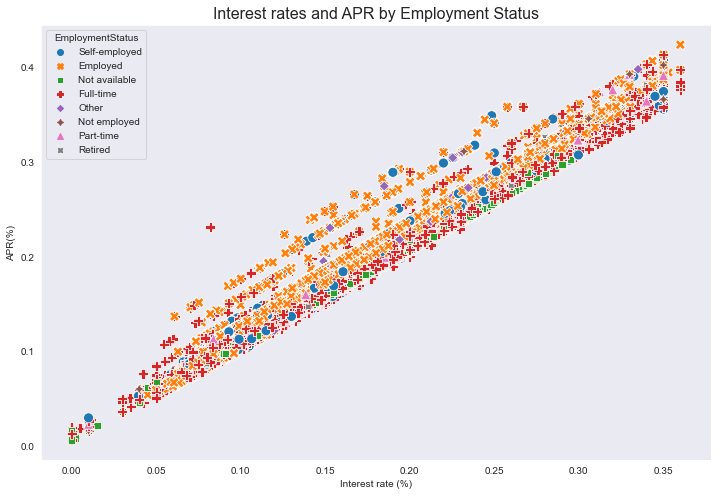

In [16]:
# plot of Borrower APR and interest rates by homeownership
plt.figure(figsize=[12, 8])
sb.scatterplot(data = prosper_loans,x = 'BorrowerRate', y = 'BorrowerAPR',
               x_jitter = 0.3,
               hue = 'EmploymentStatus', s=100, style = 'EmploymentStatus')
plt.title('Interest rates and APR by Employment Status', fontsize=16) 
plt.xlabel('Interest rate (%)')
plt.ylabel('APR(%)')
plt.show();

__Findings:__
- Part-time borrowers have the least variability in borrower rate and APR. Is this because they might be considered high risk?
- Borrowers with the most variability are employed and full-time as shown in orange and red respectively.

###  Borrower APR and Score by Homeownership

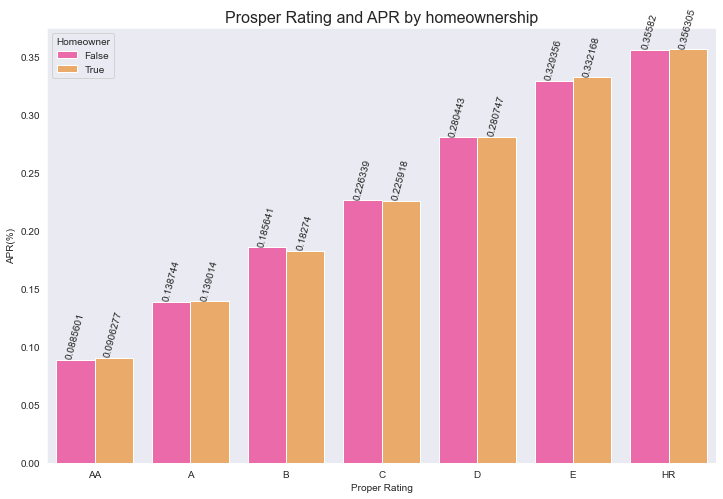

In [17]:
# plot of Borrower APR and Score by homeownership
plt.figure(figsize=[12, 8])
fig3 = sb.barplot(data = prosper_loans, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', errwidth = 0, hue = 'IsBorrowerHomeowner',
           order = ['AA','A','B','C','D','E','HR'], palette = 'spring')

for i in fig3.containers:
    fig3.bar_label(i, rotation = 75)

plt.title('Prosper Rating and APR by homeownership', fontsize=16) 
plt.xlabel('Proper Rating')
plt.ylabel('APR(%)')
plt.legend(title='Homeowner')
plt.show();

__Findings:__ 
- Homeowners and non-homeowner seem to have the same APR accross all borrower types

###  Borrower APR and  Credit Grade by Term

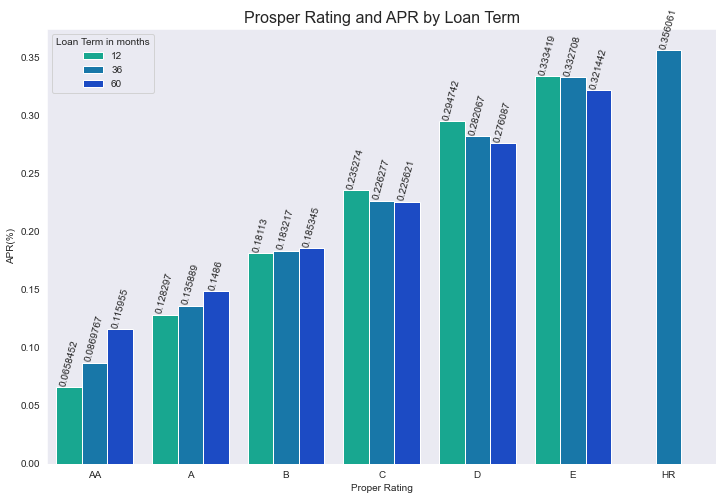

In [18]:
# plot of Borrower APR and Credit Grade by Term
plt.figure(figsize=[12, 8])
fig4 = sb.barplot(data = prosper_loans, x = 'ProsperRatingAlpha', y = 'BorrowerAPR', errwidth = 0, hue = 'Term', 
           order = ['AA','A','B','C','D','E','HR'], palette = 'winter_r')

for i in fig4.containers:
    fig4.bar_label(i, rotation = 75)

plt.title('Prosper Rating and APR by Loan Term', fontsize=16)
plt.xlabel('Proper Rating')
plt.ylabel('APR(%)')
plt.legend(title='Loan Term in months')
plt.show();

__Findings:__
- A+, A and B Grades(low-risk borrowers) have all their term loans at the lowest AP rates
- High-risk borrowers only have medium-term loans at a high interest rate.
- C, D and E-grade borrowers(medium-risk) have short-term loans at the higher AP rates. Short and medium term are at a higher AP rate than long-term loans.

<a id='close'></a>
## Conclusions

__Prosper Loan Portfolio has disclosed low annual percentages and interest rates and most borrowers's income is verified and they have a low DTI ratio which are good indicators that most borrowers effectively manage to make their monthly repayments. Prosper is extending loans to borrowers who can afford to pay them.__

__From the negative correlaton of Prosper Score and APR, a potential borrower with a high score will get a low APR. Prosper has a low proportion of high risk borrowers. The higher the borrower risk there is reduced flexibilty in loan terms but still at high APR rates. In addition, the loan portfolio has a low default rate of 4%.__



In [19]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

^C
